---------
↓ ↓ X ↓ X X G 
↓ ↓ X → → → ↑ 
→ → → ↑ X X ↑ 
↑ ↑ → ↑ → → ↑ 
---------
↓ ↓ X ↓ X X G 
↓ ↓ X → → → ↑ 
→ → → ↑ X X ↑ 
↑ ↑ → → → → ↑ 
---------
↓ ↓ X ↓ X X G 
→ ↓ X → → → ↑ 
→ → → ↑ X X ↑ 
→ → → → → → ↑ 
end
→ ↓ X ↓ X X G 
→ ↓ X → → → ↑ 
→ → → ↑ X X ↑ 
↑ ↑ ↑ ↑ → → ↑ 
---------
↓ ↓ X ↓ X X G 
↓ ↓ X → → → ↑ 
→ → → ↑ X X ↑ 
→ ↑ → → → → ↑ 
end
→ ↓ X ↓ X X G 
→ ↓ X → → → ↑ 
→ → → ↑ X X ↑ 
↑ ↑ ↑ ↑ → → ↑ 
[1.e-09 1.e-08 0.e+00 1.e-04 0.e+00 0.e+00 0.e+00 1.e-08 1.e-07 0.e+00
 1.e-03 1.e-02 1.e-01 1.e+00 1.e-07 1.e-06 1.e-05 1.e-04 0.e+00 0.e+00
 1.e-01 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02]


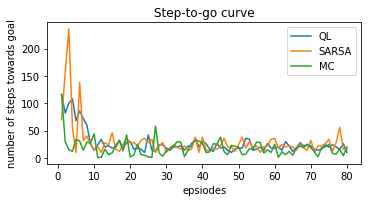

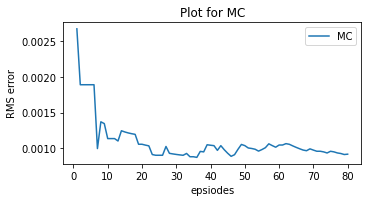

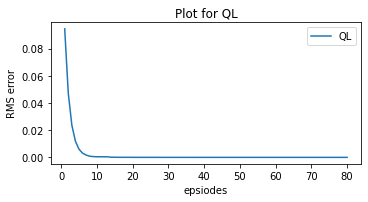

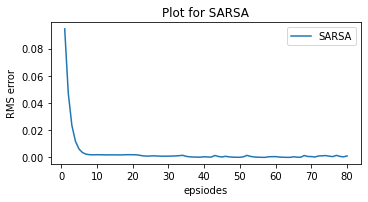

In [60]:
import numpy as np
import random
import matplotlib.pyplot as plt
class GridWorld():
    def __init__(self,rewards,states,agent):
        self.r = rewards # reward for each grid
        self.statespace = states
        self.agent = agent
    def action_map(self,action,cur):
        # 1 is N
        future = [cur[0],cur[1]]
        if action==0:
            future[0] = future[0]-1
        # 2 is E
        elif action==1:
            future[1] = future[1]+1
        # 3 is S
        elif action==2:
            future[0] = future[0]+1
        # 4 is W
        else:
            future[1] = future[1]-1
        return future

class Agent():
    def __init__(self,cur_pos,states,actions):
        self.pos = cur_pos
        self.action_space = actions
        self.state_space = states
        self.V = np.zeros((states))
        self.Q = np.zeros((states,actions))
    def make_action(self):
        action = random.randint(0,self.action_space)
        return action
    

class Controller():
    def __init__(self,start_pos,row,col,actions,reward,T):
        self.row = row
        self.col = col
        self.T = T
        self.action_space = actions
        self.agent = Agent(start_pos,row*col,actions)
        self.gridworld = GridWorld(reward,row*col,self.agent)
        self.V = np.zeros((self.row*self.col))
        self.Q = np.zeros((self.row*self.col,actions))
        for state in range(self.row*self.col):
            for action in range(0,self.action_space):
                if not self.has_position(self.gridworld.action_map(action,self.convert_back(state))):
                    self.Q[state,action] = -1000000
        self.epsilon = 0.001
    def convert(self,state):
        return state[0]*self.col+state[1]
    def convert_back(self,index):
        return [index//self.col,index-((index)//self.col*self.col)]
    def has_position(self,state):
        if state[0]<0 or state[0]>=self.row or state[1]<0 or state[1]>=self.col:
#             print("state",state)
#             print("self.row",self.row)
#             print("self.col",self.col)
#             print("illegal move!")
            return False
        elif self.T[state[0],state[1]]==1:
#             print("Terminal",self.T[state[0],state[1]])
#             print('hit wall')
            return False
        else:
#             print("Terminal",self.T[state[0],state[1]])
            return True
    def find_max(self,state,Q):
        max_value = np.max(Q[self.convert(state)])
        return max_value
    def find_argmax(self,state,Q):
        action = np.argmax(Q[self.convert(state)])
        return action
    def allmax(self,a):
        if len(a) == 0:
            return []
        all_ = [0]
        max_ = a[0]
        for i in range(1, len(a)):
            if a[i] > max_:
                all_ = [i]
                max_ = a[i]
            elif a[i] == max_:
                all_.append(i)
        return all_
    def action_policy(self,index,t):
        index = self.convert(index)
#         print("enter action_policy function",self.convert_back(index))
        epi = random.randint(0,1)
        if epi<(self.epsilon/t):
#             print("random case")
            action = random.randint(0,self.action_space-1)
            while not self.has_position(self.gridworld.action_map(action,self.convert_back(index))):
#                 print("not possible")
                action = random.randint(0,self.action_space-1)
        else:
#             action = np.argmax(self.Q[index])
            actions = self.allmax(self.Q[index])
#             print("max case")
#             print("Q value for the index",self.Q[index])
#             print("action",self.render_action(action))
            a2 = random.randint(0,len(actions)-1)
            action = actions[a2]
        return action
    def action_policy_doubleQ(self,index,t,Q2):
        index = self.convert(index)
        epi = random.randint(0,1)
        if epi<(self.epsilon/t):
            action = random.randint(0,self.action_space-1)
            while not self.has_position(self.gridworld.action_map(action,self.convert_back(index))):
                action = random.randint(0,self.action_space-1)
        else:
            actions = self.allmax(self.Q[index]+Q2[index])
            a2 = random.randint(0,len(actions)-1)
            action = actions[a2]
#             action = np.argmax(self.Q[index])
        return action
    def render_action(self,action):
        display = ''
        if action==0:
            display='\u2191'
        elif action==1:
            display='\u2192'
        elif action==2:
            display='\u2193'
        else:
            display='\u2190'
        return display
    def render(self):
#         for i in range(self.row):
#             for j in range(self.col):
#                 print(np.max(self.Q[i*self.col+j]),end=' ')
#             print()
        print("---------")
        for i in range(self.row):
            for j in range(self.col):
                if self.T[i,j]==2:
                    print("G",end=' ')
                elif self.T[i,j]==1:
                    print("X",end=' ')
                else:
                    print(self.render_action(np.argmax(self.Q[i*self.col+j])),end=' ')
            print()
    def render_DP(self):
        for i in range(self.row):
            for j in range(self.col):
                if self.T[i,j]==2:
                    print("G",end=' ')
                elif self.T[i,j]==1:
                    print("X",end=' ')
                else:
                    Update_value = []
                    for a in range(self.action_space):
                        future = self.gridworld.action_map(a,[i,j])
                        if not self.has_position(future):
                            future = [i,j]
                            reward = -100000
                        else:
                            reward = self.gridworld.r[future[0],future[1]]
                        Update_value.append(reward+0.01*self.V[self.convert(future)])
                    max_action = np.argmax(np.array(Update_value))
                    print(self.render_action(max_action),end=' ')
            print()
        print(self.V)
            
    def render_DQ(self,Q):
#         print("V table for DQ")
#         for i in range(self.row):
#             for j in range(self.col):
#                 print(np.max((self.Q[i*self.col+j]+Q[i*self.col+j])/2),end=' ')
#             print()
#         print("---------")
        for i in range(self.row):
            for j in range(self.col):
                if self.T[i,j]==2:
                    print("G",end=' ')
                elif self.T[i,j]==1:
                    print("X",end=' ')
                else:
                    print(self.render_action(np.argmax(self.Q[i*self.col+j]+Q[i*self.col+j])),end=' ')
            print()
    def reset(self):
        self.V = np.zeros((self.row*self.col))
        self.Q = np.zeros((self.row*self.col,self.action_space))
        for state in range(self.row*self.col):
            for action in range(0,self.action_space):
                if not self.has_position(self.gridworld.action_map(action,self.convert_back(state))):
                    self.Q[state,action] = -1000000
        self.epsilon = 0.001
    def eval_mode(self,QL):
        self.V = np.zeros((self.row*self.col))
        self.Q = QL
        for state in range(self.row*self.col):
            for action in range(0,self.action_space):
                if not self.has_position(self.gridworld.action_map(action,self.convert_back(state))):
                    self.Q[state,action] = -1000000
        self.epsilon = 0
    def generate_epsiode(self):
        epsiode = []
#         start = [0,0]
        Reward = []
        step = 0
        states = []
        row_s = random.randint(0,self.row-1)
        col_s = random.randint(0,self.col-1)
        start = [row_s,col_s]
        while(self.T[row_s,col_s]!=0):
            row_s = random.randint(0,self.row-1)
            col_s = random.randint(0,self.col-1)
            start = [row_s,col_s]
        while self.T[start[0],start[1]] !=2:
            action = self.action_policy(start,1)
            future = self.gridworld.action_map(action,start)
            reward = self.gridworld.r[future[0],future[1]]
            epsiode.append((self.convert(start),action,reward))
            states.append((self.convert(start),action))
            start = future
            step = step+1
        return epsiode,states,step
    def start(self,mode):
        alpha = 0.5
        gamma = 0.01
#         row_s = random.randint(0,self.row-1)
#         col_s = random.randint(0,self.col-1)
        start = [0,0]
        Reward = []
        V_step = []
        Q2 = self.Q
        if mode == 'QL': # off policy TD
            iteration=0
            step = 0
            while iteration<=5000:
                while self.T[start[0],start[1]] ==2:
                    #print("epsiode over, start again")
#                     row_s = random.randint(0,self.row-1)
#                     col_s = random.randint(0,self.col-1)
                    start = [0,0]
                    Reward.append(step)
                    step = 0
                    V_step.append(np.max(self.Q,axis=1))
#                 print("select action")
#                 print("state",start)
                action = self.action_policy(start,1)
#                 print("action:",self.render_action(action))
                future = self.gridworld.action_map(action,start)
                reward = self.gridworld.r[future[0],future[1]]
                self.Q[self.convert(start),action] = (1-alpha)*self.Q[self.convert(start),action]+alpha*(reward+gamma*self.find_max(future,self.Q))
                start = future
                iteration+=1
                step+=1
            self.render()
        elif mode == 'Sarsa': #on policy TD
            iteration=0
#             row_s = random.randint(0,self.row-1)
#             col_s = random.randint(0,self.col-1)
            start = [0,0]
            step = 0
#             while self.T[start[0],start[1]] !=0:
#                 row_s = random.randint(0,self.row-1)
#                 col_s = random.randint(0,self.col-1)
            action = self.action_policy(start,1)
            while iteration<=5000:
                while self.T[start[0],start[1]] ==2:
                    #epsiode over, start again
#                     row_s = random.randint(0,self.row-1)
#                     col_s = random.randint(0,self.col-1)
                    start = [0,0]
                    action = self.action_policy(start,1)
                    Reward.append(step)
                    V_step.append(np.max(self.Q,axis=1))
                    step = 0
                future = self.gridworld.action_map(action,start)
                reward = self.gridworld.r[future[0],future[1]]
                action_future = self.action_policy(future,1)
#                 print("current state:",start)
#                 print("current action:",self.render_action(action))
#                 print("future state:",future)
#                 print("future action selected",self.render_action(action_future))
                self.Q[self.convert(start),action] = (1-alpha)*self.Q[self.convert(start),action]+alpha*(reward+gamma*self.Q[self.convert(future),action_future])
                start = future
                action = action_future
                step +=1
                iteration+=1
            self.render()
            print("end")
        elif mode == 'DQL': # double Q
            iteration=0
            step = 0
            while iteration<=5000:
                if iteration>=4900:
                    self.epsilon = 0
                while self.T[start[0],start[1]] ==2:
                    #print("epsiode over, start again")
#                     row_s = random.randint(0,self.row-1)
#                     col_s = random.randint(0,self.col-1)
                    start = [0,0]
                    Reward.append(step)
                    V_step.append(np.max((self.Q+Q2),axis=1))
                    step = 0
                action = self.action_policy(start,1)
                future = self.gridworld.action_map(action,start)
                reward = self.gridworld.r[future[0],future[1]]
                dq = random.randint(0,1)
                if dq<=0.5:
                    self.Q[self.convert(start),action] = (1-alpha)*self.Q[self.convert(start),action]+alpha*(reward+gamma*Q2[self.convert(future),self.find_argmax(future,self.Q)])
                else:
                    Q2[self.convert(start),action] = (1-alpha)*Q2[self.convert(start),action]+alpha*(reward+gamma*self.Q[self.convert(future),self.find_argmax(future,Q2)])
                start = future
                iteration+=1
                step+=1
            self.render_DQ(Q2)
        elif mode == 'MC': # first visit MC value estimation
            iteration = 0
            Returns = [[[]for j in range(self.action_space)] for i in range(self.row*self.col)]
            while iteration<=100:
                epsiode,state_action_pairs,steps = self.generate_epsiode()
                G = 0
                for i in range(len(epsiode)-1,-1,-1):
                    G = gamma*G+epsiode[i][2]
                    temp_states = state_action_pairs[i-1::-1]
                    if state_action_pairs[i] in temp_states:
                        pass
                    else:
                        Returns[state_action_pairs[i][0]][state_action_pairs[i][1]].append(G)
                        self.Q[state_action_pairs[i][0],state_action_pairs[i][1]] = sum(Returns[state_action_pairs[i][0]][state_action_pairs[i][1]])/len(Returns[state_action_pairs[i][0]][state_action_pairs[i][1]])
                Reward.append(steps)
                V_step.append(np.max(self.Q,axis=1))
                iteration+=1
            self.render()
        elif mode == 'DP':
            gamma = 0.1
            iteration=0
            while True:
                delta = 0
                for i in range(self.row):
                    for j in range(self.col):
                        if self.T[i,j]==0:
                            v = self.V[self.convert([i,j])]
                            Update_value = []
                            for a in range(self.action_space):
                                future = self.gridworld.action_map(a,[i,j])
                                if not self.has_position(future):
                                    future = [i,j]
                                    reward = -100
                                else:
                                    reward = self.gridworld.r[future[0],future[1]]
                                Update_value.append(reward+gamma*self.V[self.convert(future)])
                            max_update = max(Update_value)
                            self.V[self.convert([i,j])] = max_update
                            delta = max([delta,abs(v-self.V[self.convert([i,j])])])
                        else:
                            pass
                V_step.append(self.V)
                Reward.append(iteration)
                iteration +=1
                if delta<0.00000001:
                    break
            self.render_DP()
        else:
            pass
        return Reward,V_step
        
def main():
#     R = np.array([[0,0,0],[0,0,0],[0,0,80]])
#     Terminal = np.array([[0,0,0],[0,0,0],[0,0,2]])
    R = np.array([[0,0,0,0,0,0,1],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])
    Terminal = np.array([[0,0,1,0,1,1,2],[0,0,1,0,0,0,0],[0,0,0,0,1,1,0],[0,0,0,0,0,0,0]])
    start = [0,0]
    actions = 4
    controller = Controller(start,R.shape[0],R.shape[1],actions,R,Terminal)
    Reward_QL,V_QL = controller.start("QL")
    V_optimal = np.max(controller.Q,axis=1)
#     print("theoretical value table K",np.max(controller.Q,axis=1))
    controller.reset()
    Reward_MC,V_MC = controller.start("MC")
    controller.reset()
    Reward_SARSA,V_SARSA = controller.start("Sarsa")
    controller.reset()
    Reward_DQL,V_DQL= controller.start("DQL")
#     V_optimal = np.max(controller.Q,axis=1)
    controller.reset()
    Reward_SARSA,V_SARSA = controller.start("Sarsa")
    controller.reset()
    Reward_DP,V_DP = controller.start("DP")
    RMSE_QL = []
    RMSE_DQL = []
    RMSE_SARSA = []
    RMSE_DP = []
    RMSE_MC = []
    for x in V_QL:
        RMSE_QL.append(np.sqrt(np.mean((x-V_optimal)**2)))
    for x in V_DQL:
        RMSE_DQL.append(np.sqrt(np.mean((x-V_optimal)**2)))
    for x in V_SARSA:
        RMSE_SARSA.append(np.sqrt(np.mean((x-V_optimal)**2)))
    for x in V_DP:
        RMSE_DP.append(np.sqrt(np.mean((x-V_optimal)**2)))
    for x in V_MC:
        RMSE_MC.append(np.sqrt(np.mean((x-V_optimal)**2)))
    x1 = []
    for i in range(len(Reward_DQL)):
        x1.append(i+1)
    x2 = []
    for i in range(len(Reward_QL)):
        x2.append(i+1)
    x3 = []
    for i in range(len(Reward_SARSA)):
        x3.append(i+1)
    x4 = []
    for i in range(len(Reward_DP)):
        x4.append(i+1)
    x5 = []
    for i in range(len(Reward_MC)):
        x5.append(i+1)
    fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
#     ax.plot(x1[0:80:1],Reward_DQL[0:80:1], label='DQL')
    ax.plot(x2[0:80:1],Reward_QL[0:80:1],label='QL')
    ax.plot(x3[0:80:1],Reward_SARSA[0:80:1],label='SARSA')
    ax.plot(x5[0:80:1],Reward_MC[0:80:1],label='MC')
    ax.set_xlabel('epsiodes')  # Add an x-label to the axes.
    ax.set_ylabel('number of steps towards goal')  # Add a y-label to the axes.
    ax.set_title("Step-to-go curve")  # Add a title to the axes.
    ax.legend()  # Add a legend.
    fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
#     ax.plot(x1[0:10:1],RMSE_DQL[0:10:1],label='DQL')
#     ax.plot(x2[0:10:1],RMSE_QL[0:10:1],label='QL')
#     ax.plot(x3[0:10:1],RMSE_SARSA[0:10:1],label='SARSA')
#     ax.plot(x4,RMSE_DP,label='DP')
    ax.plot(x5[0:80:1],RMSE_MC[0:80:1], label='MC')

    ax.set_xlabel('epsiodes')  # Add an x-label to the axes.
    ax.set_ylabel('RMS error')  # Add a y-label to the axes.
    ax.set_title("Plot for MC")  # Add a title to the axes.
    ax.legend()  # Add a legend.

    fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
    ax.plot(x2[0:80:1],RMSE_QL[0:80:1],label='QL')

    ax.set_xlabel('epsiodes')  # Add an x-label to the axes.
    ax.set_ylabel('RMS error')  # Add a y-label to the axes.
    ax.set_title("Plot for QL")  # Add a title to the axes.
    ax.legend()  # Add a legend.
    fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
    ax.plot(x3[0:80:1],RMSE_SARSA[0:80:1],label='SARSA')

    ax.set_xlabel('epsiodes')  # Add an x-label to the axes.
    ax.set_ylabel('RMS error')  # Add a y-label to the axes.
    ax.set_title("Plot for SARSA")  # Add a title to the axes.
    ax.legend()  # Add a legend.
    
if __name__ == "__main__":
    main()
